In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv(r'C:/Users/abdul/Desktop/Pokemon.csv', encoding = 'unicode_escape')

In [98]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [99]:
df.drop(columns=['#'], axis=1, inplace=True)

### Useful seaborn plots

(0, 140.46168752766934)

<Figure size 720x432 with 0 Axes>

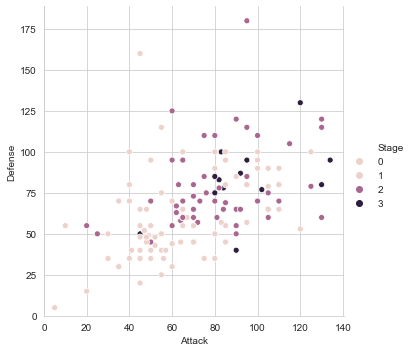

In [128]:
'''
Scatter plot
'''
plt.figure(figsize=(10,6))
sns.relplot(x="Attack", y="Defense", data = df, hue='Stage')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

(0, 141.97310248937742)

<Figure size 720x432 with 0 Axes>

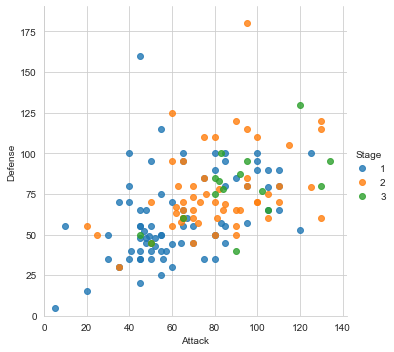

In [120]:
# or
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
plt.ylim(0, None)
plt.xlim(0, None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

<Figure size 720x432 with 0 Axes>

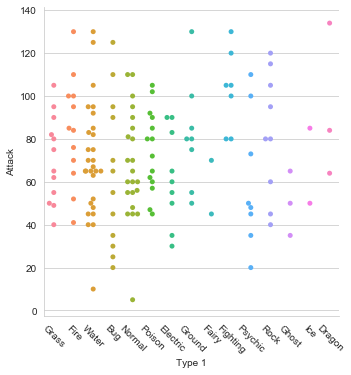

In [101]:
'''
Jitter plot for categorical variables
'''
plt.figure(figsize=(10,6))
# sns.catplot(x="Name", y="Attack", data=df, jitter=False)
sns.catplot(x="Type 1", y="Attack", kind = "swarm", data=df)
# plt.xscale('log')
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

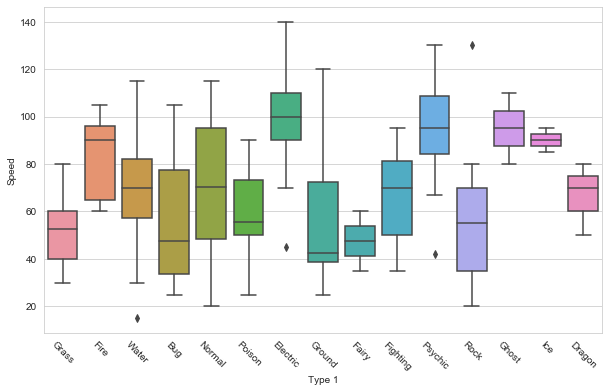

In [102]:
'''
Box plot
'''
plt.figure(figsize=(10,6))
sns.boxplot(x='Type 1' , y= 'Speed', data=df)
plt.xticks(rotation=-45)
# or
# sns.catplot(x="Type 1", y="Speed", kind = "box", data=df)

In [103]:
# Set theme
sns.set_style('whitegrid')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

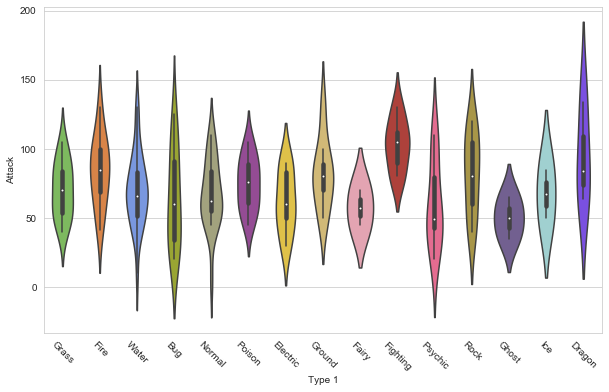

In [104]:
'''
Violin plot
'''
# color palette usage
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Violin plot with Pokemon color palette
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors)
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

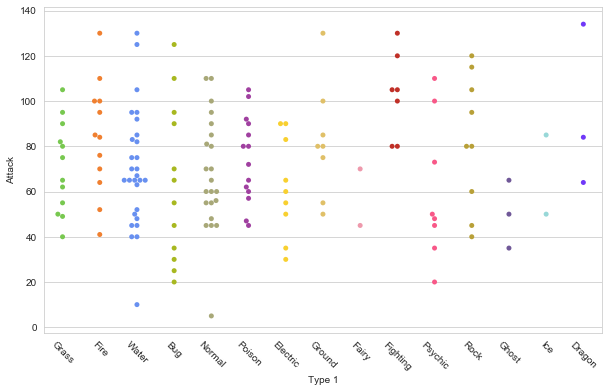

In [105]:
'''
Swarm plot
'''
plt.figure(figsize=(10,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

Text(0.5, 1.0, 'Attack by Type')

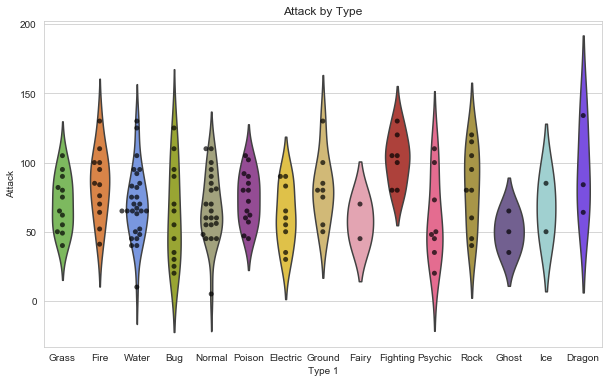

In [106]:
'''
Overlaying plots
'''
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

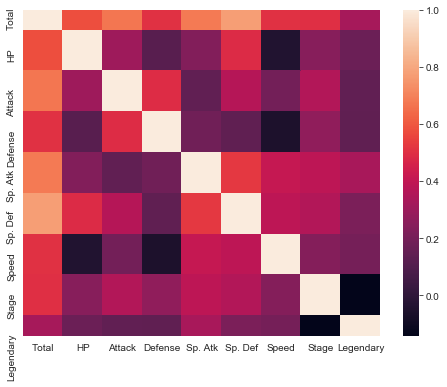

In [107]:
'''
Heatmap
'''
plt.figure(figsize=(8,6))
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr)

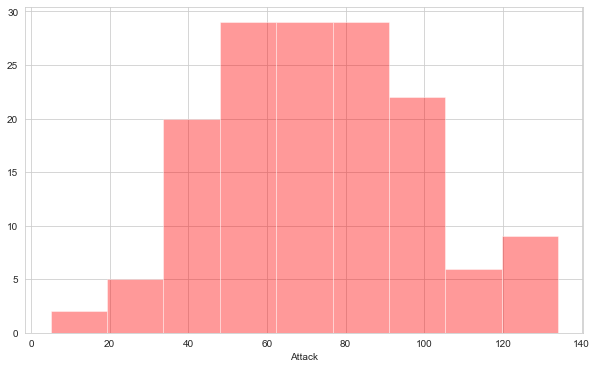

In [108]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10,6))
sns.distplot(df.Attack, kde=False, color="red")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

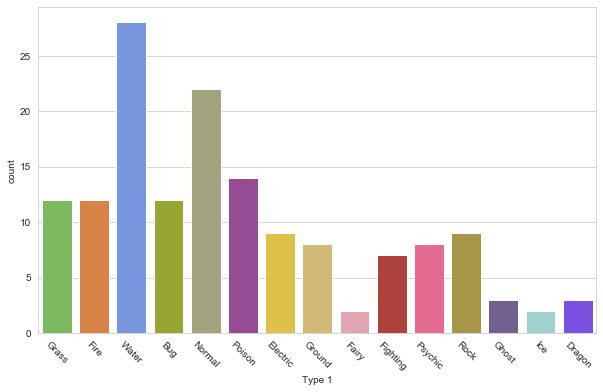

In [109]:
'''
Count plot
'''
plt.figure(figsize=(10,6))
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

C:\Users\abdul\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


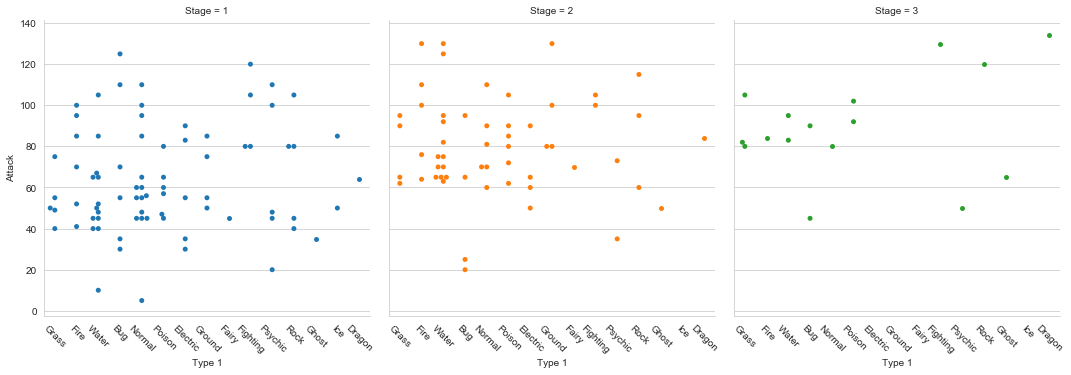

In [110]:
'''
Factor plots make it easy to separate plots by categorical classes.
'''
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

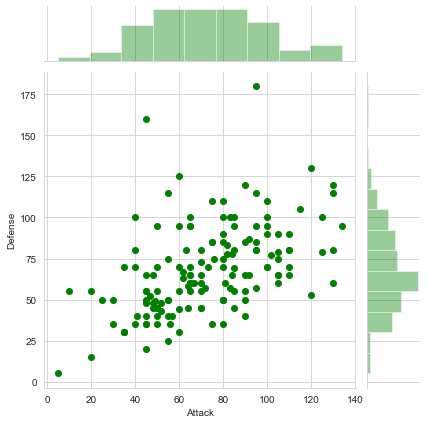

In [111]:
'''
Joint plots
'''
sns.jointplot(x="Attack", y="Defense", data=df, color='green');

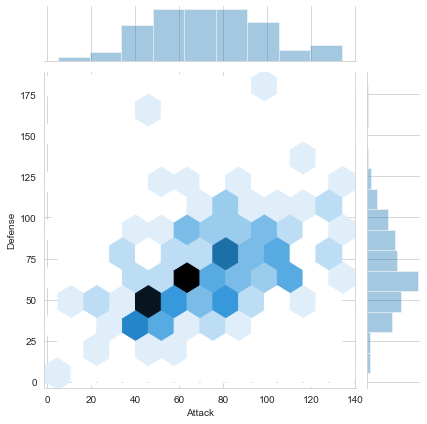

In [112]:
# Hex jointplot
sns.jointplot(x='Attack', y='Defense', kind="hex", data = df)

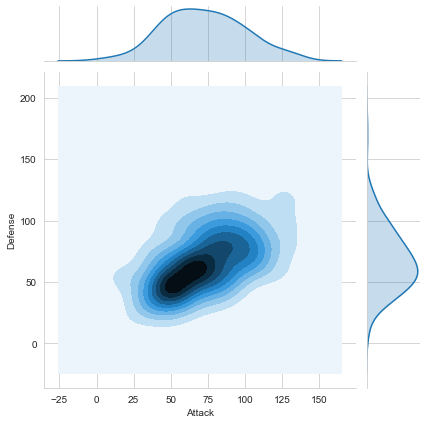

In [113]:
# KDE plot
sns.jointplot(x="Attack", y="Defense", data=df, kind="kde");

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

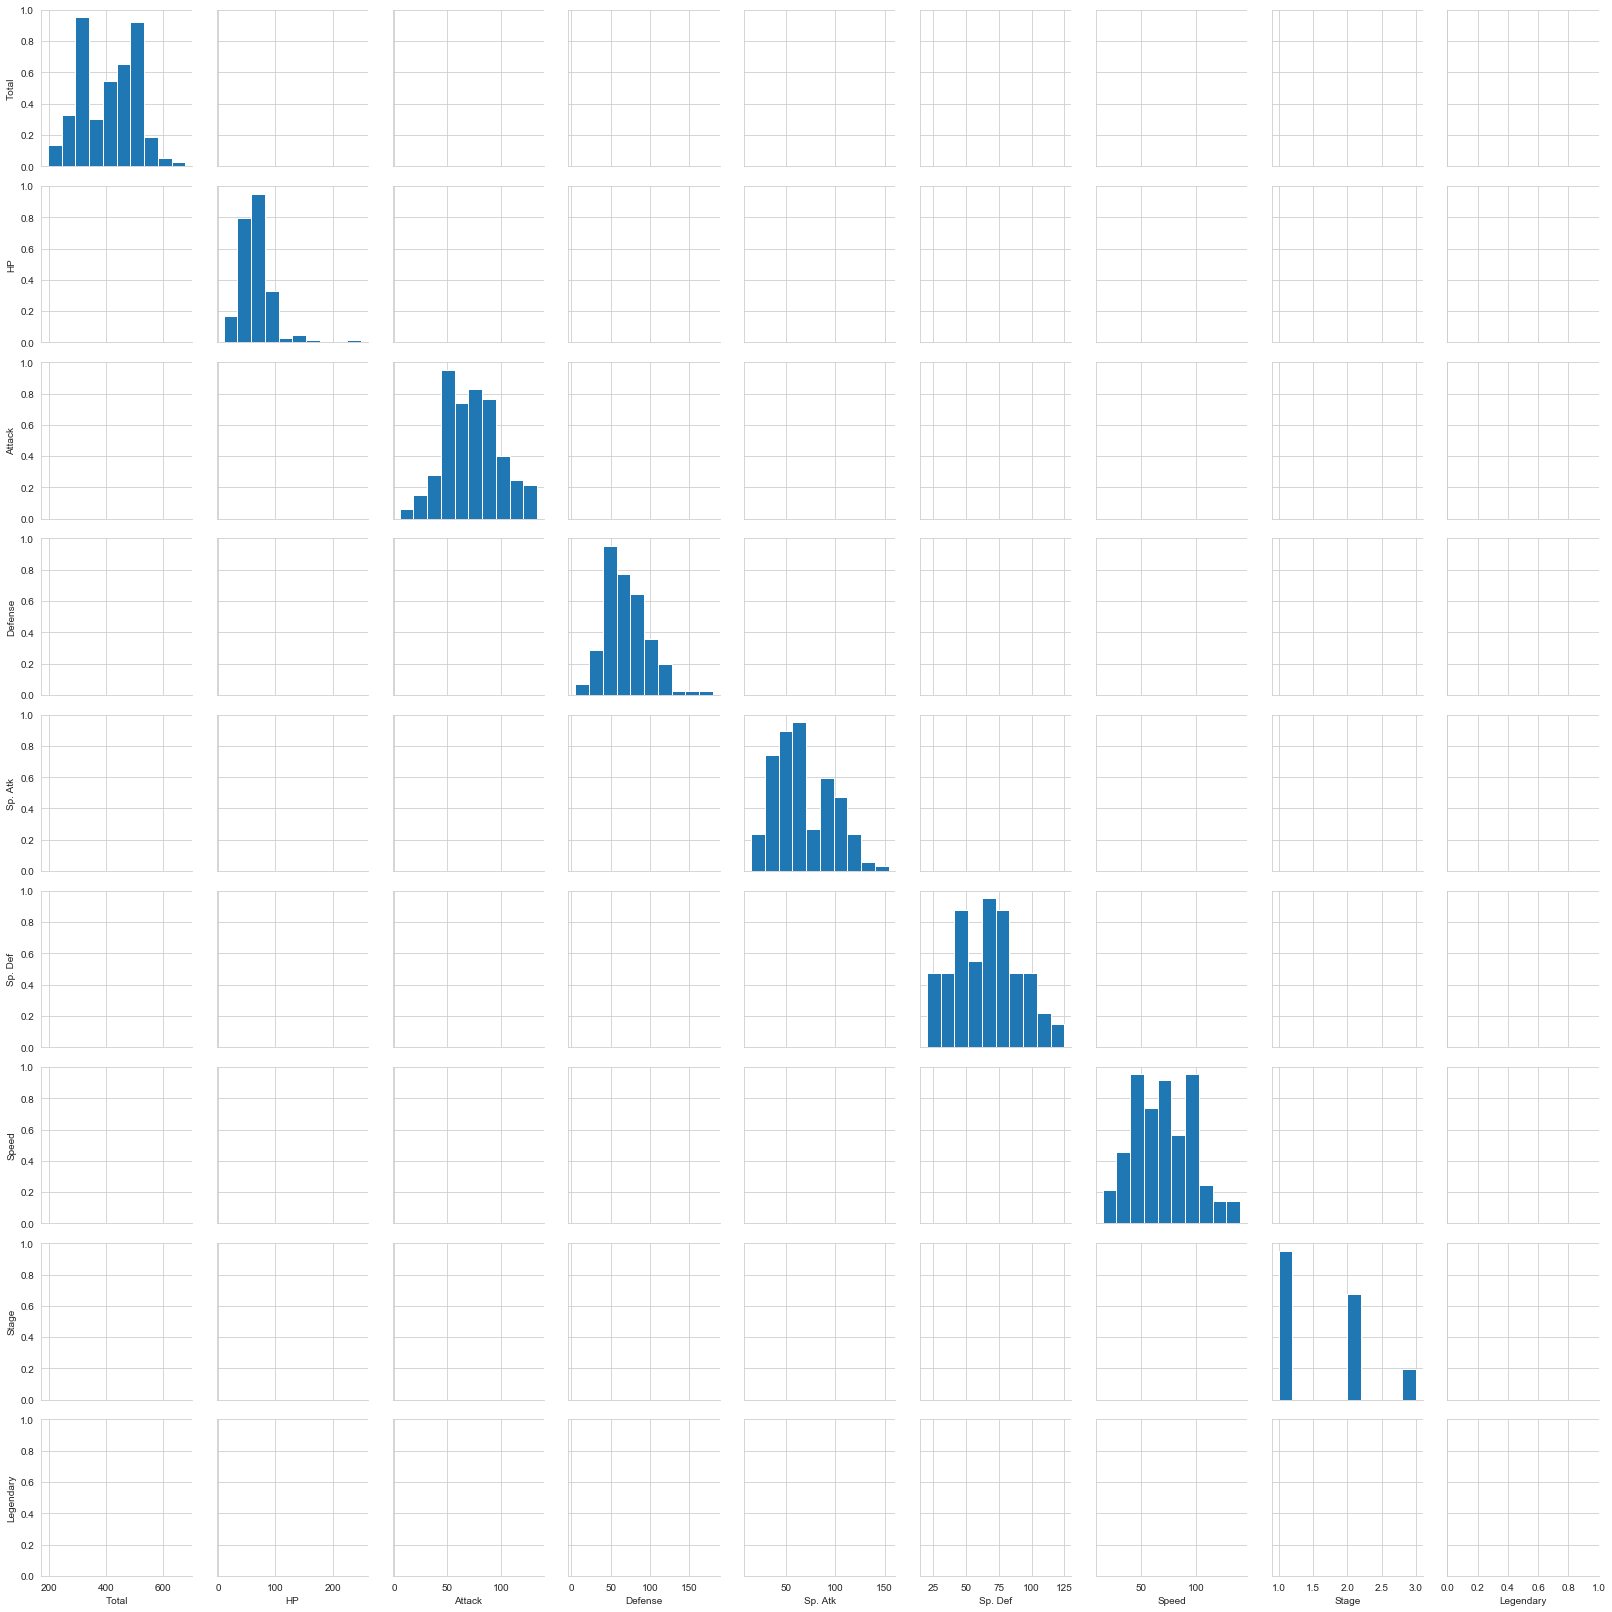

In [114]:
'''
Pair plots (correlation plot)
'''
sns.pairplot(df)